In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Extraction and Selection

In [2]:
mango = pd.read_excel('ML1_dataset.xlsx',sheet_name='Class 1 - Mango')
orange = pd.read_excel('ML1_dataset.xlsx',sheet_name='Class 2 - Orange')
banana = pd.read_excel('ML1_dataset.xlsx',sheet_name='Class 3 - Banana')

In [3]:
#apply hue
def hue(r,g,b):
    R = r/255
    G = g/255
    B = b/255
    
    max_val = max(R,G,B)
    min_val = min(R,G,B)
    
    if max_val == R:
        hue = (G - B) / (max_val - min_val)
    elif max_val == G:
        hue = 2.0 + (B - R) / (max_val - min_val)
    elif max_val == B:
        hue = 4.0 + (R - G) / (max_val - min_val)   
    else:
        print("Hmmm, something wrong.")
    
    if hue > 0:
        return hue*60
    else:
        return hue + 360
    
mango['Hue'] = mango.apply(lambda x: hue(x['R'],x['G'],x['B']),axis=1)
orange['Hue'] = orange.apply(lambda x: hue(x['R'],x['G'],x['B']),axis=1)
banana['Hue'] = banana.apply(lambda x: hue(x['R'],x['G'],x['B']),axis=1)

In [4]:
orange.head()

,Image,R,G,B,StDev,Median,Skew,AR,Round,Hue
0,1,236.764,200.613,153.233,33.247,138,0.660,1.025,0.976,34.032874
1,2,245.911,266.276,179.424,37.526,156,0.758,1.010,0.990,74.068761
2,3,116.534,109.282,18.273,28.342,115,0.587,1.681,0.595,55.571793
3,4,220.972,215.616,191.501,32.131,147,0.943,1.130,0.885,49.095721
4,5,249.121,206.316,122.162,20.441,151,1.635,1.037,0.965,39.770635


### Normalize Features

In [5]:
#create label for plotting
mango['Class'] = 'mango'
orange['Class'] = 'orange'
banana['Class'] = 'banana'

In [6]:
data = pd.concat([mango,orange,banana],axis=0,ignore_index=True)

#normalize features
data['Hue'] = data['Hue']/data['Hue'].max()
data['AR'] = data['AR']/data['AR'].max()
data['Median'] = data['Median']/data['Median'].max()
data['StDev'] = data['StDev']/data['StDev'].max()

skew_min, skew_max = data['Skew'].min(), data['Skew'].max()
data['Skew'] = (data['Skew']-skew_min) / (skew_max-skew_min)
# data.to_csv('ML1_dataset.csv')
data.sample(10)

,Image,R,G,B,StDev,Median,AR,Skew,Round,Hue,Class
0,1,215.000,210.000,177.000,0.728433,0.875598,0.611151,0.396540,0.593,0.623942,mango
25,5,249.121,206.316,122.162,0.416000,0.722488,0.375453,0.930334,0.965,0.476239,orange
52,11,136.970,133.650,77.491,0.560433,0.645933,0.562274,0.362630,0.644,0.678374,banana
7,8,252.000,213.000,56.000,0.429636,0.660287,0.553946,0.741638,0.654,0.575516,mango
16,17,253.000,175.000,16.000,0.278670,0.732057,0.516655,0.839677,0.701,0.482017,mango
41,21,253.413,222.518,168.939,0.727415,0.861244,0.405503,0.609689,0.892,0.455706,orange
37,17,249.065,210.171,165.806,0.659055,0.688995,0.654960,0.829988,0.553,0.382845,orange
50,9,227.828,228.412,179.532,0.869345,0.813397,0.611875,0.171626,0.592,0.727062,banana
12,13,246.000,182.000,66.000,0.330830,0.794258,0.607169,0.418454,0.596,0.463019,mango
22,2,245.911,266.276,179.424,0.763701,0.746411,0.365677,0.728028,0.990,0.886946,orange


### Check for feature variance

In [7]:
from sklearn.feature_selection import VarianceThreshold

data_features = data.drop(['Image','R','G','B','Class'],axis=1)
data_var = VarianceThreshold()
data_var.fit_transform(data_features)

for feature in zip(data_features.columns, data_var.variances_):
    print(feature)

('StDev', 0.033138322667963266)
('Median', 0.014353818961030771)
('AR', 0.018831651302488466)
('Skew', 0.0544151538502153)
('Round', 0.02451508440413202)
('Hue', 0.017996598674364664)


## Plot feature data

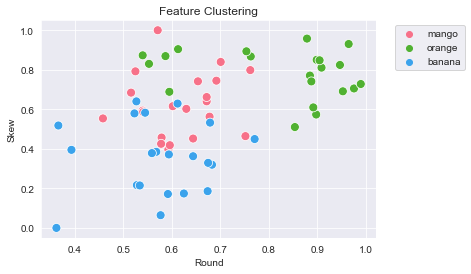

In [8]:
sns.set_style("darkgrid")
g = sns.scatterplot(data=data, x='Round', y='Skew', hue='Class', s=80, palette='husl')
g.set_title('Feature Clustering')

handles, labels = g.get_legend_handles_labels()
#remove legend title
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('skew_round.png',bbox_inches='tight',dpi=300)
plt.show()

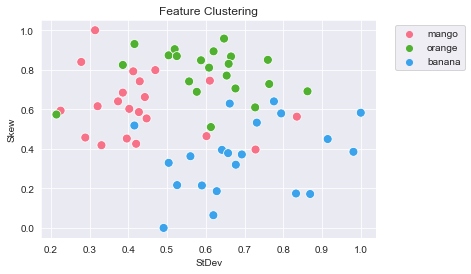

In [9]:
g = sns.scatterplot(data=data, x='StDev', y='Skew', hue='Class', s=80, palette='husl')
g.set_title('Feature Clustering')

handles, labels = g.get_legend_handles_labels()
#remove legend title
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('skew_stdev.png',bbox_inches='tight',dpi=300)
plt.show()

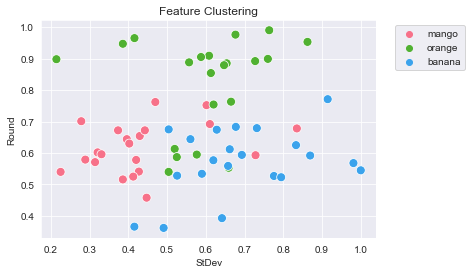

In [10]:
g = sns.scatterplot(data=data, x='StDev', y='Round', hue='Class', s=80, palette='husl')
g.set_title('Feature Clustering')

handles, labels = g.get_legend_handles_labels()
#remove legend title
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('stdev_round.png',bbox_inches='tight',dpi=300)
plt.show()

## Perceptron Algorithm
In this algorithm, we combined two classes into one input array resulting to only one weight

In [11]:
def X_2input(class1,class2,label1,label2,M):
    class1['Label'] = label1
    class2['Label'] = label2
    
    feature_input = pd.concat([class1,class2],axis=0,ignore_index=True)
    skew_min, skew_max = feature_input['Skew'].min(), feature_input['Skew'].max()
    feature_input['Skew'] = (feature_input['Skew']-skew_min) / (skew_max-skew_min)
    feature_input['StDev'] = feature_input['StDev']/feature_input['StDev'].max()
    
    #create feature vector; M - number of features
    N = len(feature_input)
    feature = np.ones((N,M+1))
    feature[:,1:] = feature_input[['Skew','StDev','Round']].to_numpy(dtype=float)
    
    #expected output
    expected = np.zeros((N,1))
    expected[:,0] = feature_input['Label']
    
    return feature, expected

In [31]:
def perceptron(class1,class2,label1,label2,M,num_iterations,learning_constant):
    
    feature, expected = X_2input(class1,class2,label1,label2,M)
    
    #initialize weight
    W = np.random.randn(1,feature.shape[1])
    
    cost = []
    for i in range(1,num_iterations+1):
        #calculate for z param
        z = np.dot(feature,W.T) #if features as columns (X*W)

        #activation function
        a = np.ones(shape=z.shape)
        a[np.where(z<0)] = -1

        #calculate the weight change
        dw = learning_constant * np.dot((expected-a).T,feature) / feature.shape[0]
        
        cost_func = 0.5*np.sum((a-expected)**2)
        cost.append(cost_func)

        #update the weights
        W += dw
        
    return W, feature, expected, cost

In [39]:
W_mo, feature_mo, expected_mo, cost_mo = perceptron(mango,orange,1,-1,3,1000,0.1)
W_mb, feature_mb, expected_mb, cost_mb = perceptron(mango,banana,1,-1,3,1000,0.1)
W_bo, feature_bo, expected_bo, cost_bo = perceptron(banana,orange,1,-1,3,1000,0.1)

In [37]:
def cost_plot(class1,class2,cost,savename):
    #plot weight change
    x = np.arange(0,len(cost))

    plt.title('Perceptron Cost Function ({}-{})'.format(class1,class2))
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost Function')

    plt.plot(x,cost)
    plt.savefig(savename,bbox_inches='tight',dpi=300)
    plt.show()

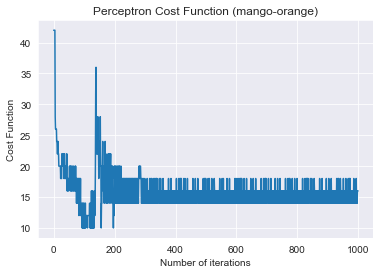

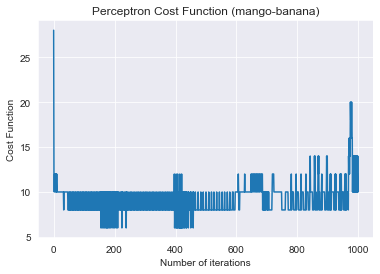

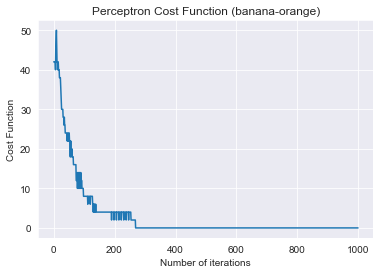

In [40]:
cost_plot('mango','orange',cost_mo,'per_costfunction_mo.png')
cost_plot('mango','banana',cost_mb,'per_costfunction_mb.png')
cost_plot('banana','orange',cost_bo,'per_costfunction_bo.png')

In [41]:
#fit decision line
W_0 = W_mo[0,0]
W_1 = W_mo[0,1]
W_2 = W_mo[0,2]
W_3 = W_mo[0,3]

x_1 = 0.758 / orange['Skew'].max()                         #skew
x_2 = 45.07 / orange['StDev'].max()
x_3 = 0.938                                                #round

equation = W_0 + W_1*x_1 + W_2*x_2 + W_3*x_3
print(equation)

if equation > 0:
    print('This is a mango')
else:
    print('This is an orange')

-0.047378682609536704
This is an orange


### Training accuracy of the model

In [17]:
def accuracy(feature,W,expected):
    
    z = np.dot(feature,W.T)    
    a = np.ones(shape=z.shape)
    a[np.where(z<0)] = -1

    training_output = pd.DataFrame([a.flatten(),expected.flatten()],index=['predicted','expected']).T
    true_pos = training_output[(training_output.predicted > 0) & (training_output.expected == 1)]
    true_neg = training_output[(training_output.predicted < 0) & (training_output.expected == -1)]
    correct = len(true_pos) + len(true_neg)
    accuracy = (correct/len(training_output))*100

    return accuracy

In [42]:
print("Mango-Orange Model Training Accuracy: {}".format(accuracy(feature_mo,W_mo,expected_mo)))
print("Mango-Banana Model Training Accuracy: {}".format(accuracy(feature_mb,W_mb,expected_mb)))
print("Banana-Orange Model Training Accuracy: {}".format(accuracy(feature_bo,W_bo,expected_bo)))

Mango-Orange Model Training Accuracy: 83.33333333333334
Mango-Banana Model Training Accuracy: 83.33333333333334
Banana-Orange Model Training Accuracy: 100.0


### Plot feature data with regression line

$y = \frac{C}{B} - \frac{A}{B}x$

In [19]:
def feature_class(class1,class2):
    feature_input = pd.concat([class1,class2],axis=0,ignore_index=True)
    skew_min, skew_max = feature_input['Skew'].min(), feature_input['Skew'].max()
    feature_input['Skew'] = (feature_input['Skew']-skew_min) / (skew_max-skew_min)
    feature_input['StDev'] = feature_input['StDev']/feature_input['StDev'].max()
    
    return feature_input

### Two-Class Decision Line

In [20]:
def plot_2class(class1,class2,W,x,y,hue,savename):
    feature_input = feature_class(class1,class2)
    
    A, B, C = W[0,1], W[0,2], -W[0,0]
    y_bound = (C/B) - (A/B)*feature_input[x]

    g = sns.scatterplot(data=feature_input, x=x, y=y, hue=hue)
    plt.plot(feature_input[x],y_bound/max(y_bound))

    g.set_title('2-Class Decision Boundary')
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
#     plt.savefig(savename,bbox_inches='tight',dpi=300)
    plt.show()

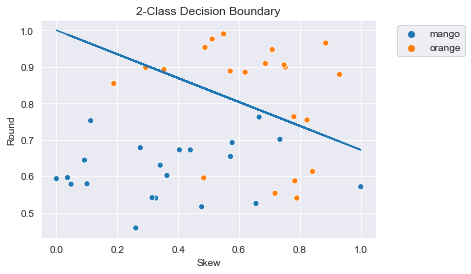

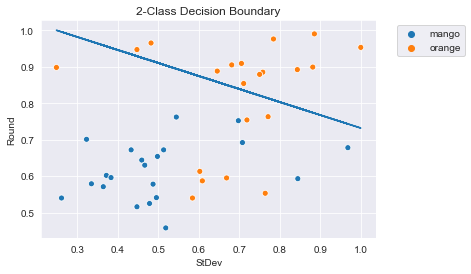

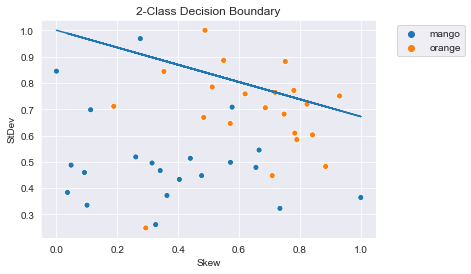

In [43]:
plot_2class(mango,orange,W_mo,'Skew','Round','Class','mo_skew_round.png')
plot_2class(mango,orange,W_mo,'StDev','Round','Class','mo_stdev_round.png')
plot_2class(mango,orange,W_mo,'Skew','StDev','Class','mo_skew_stdev.png')

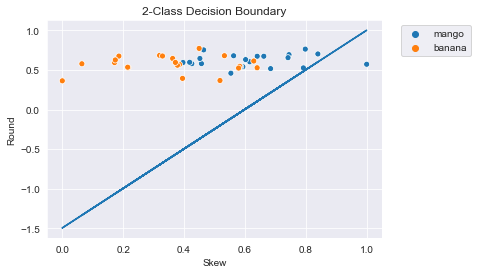

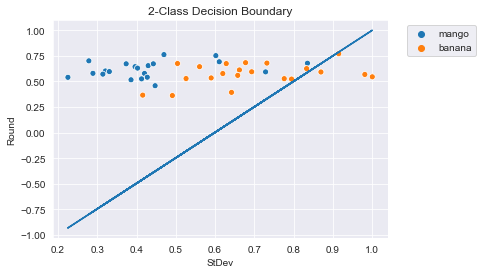

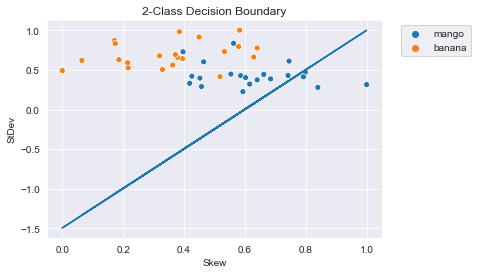

In [44]:
plot_2class(mango,banana,W_mb,'Skew','Round','Class','mb_skew_round.png')
plot_2class(mango,banana,W_mb,'StDev','Round','Class','mb_stdev_round.png')
plot_2class(mango,banana,W_mb,'Skew','StDev','Class','mb_skew_stdev.png')

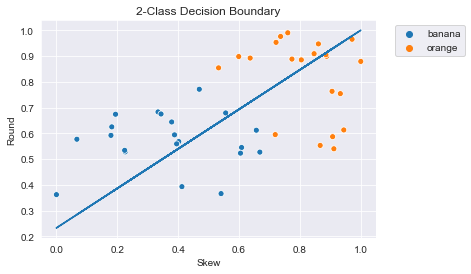

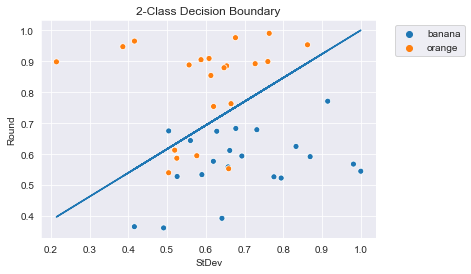

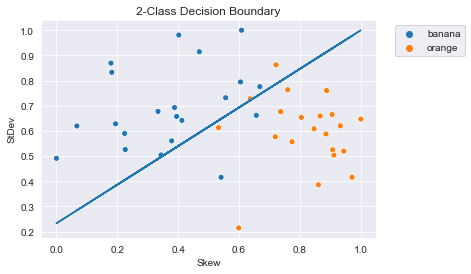

In [23]:
plot_2class(banana,orange,W_bo,'Skew','Round','Class','bo_skew_round.png')
plot_2class(banana,orange,W_bo,'StDev','Round','Class','bo_stdev_round.png')
plot_2class(banana,orange,W_bo,'Skew','StDev','Class','bo_skew_stdev.png')

### Three-Class Decision Line
Not sure it this is acceptable with only 2 classes used for the perceptron algorithm itself

In [24]:
A, B, C = W_mo[0,1], W_mo[0,2], -W_mo[0,0]

y_round = (C/B) - (A/B)*data['Round']
y_skew = (C/B) - (A/B)*data['Skew']
y_stdev = (C/B) - (A/B)*data['StDev']

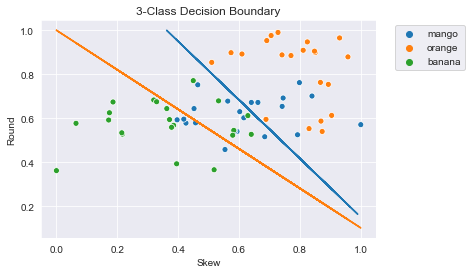

In [25]:
g = sns.scatterplot(data=data, x='Skew', y='Round', hue='Class')
plt.plot(data['Round'],y_round/max(y_round))
plt.plot(data['Skew'],y_skew/max(y_skew))

g.set_title('3-Class Decision Boundary')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('feature_skew_round.png',bbox_inches='tight',dpi=300)
plt.show()

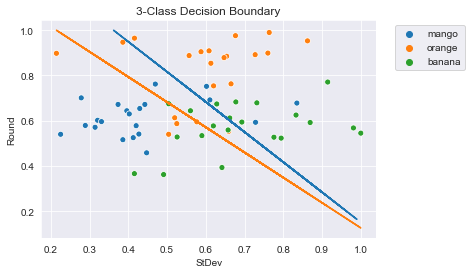

In [26]:
g = sns.scatterplot(data=data, x='StDev', y='Round', hue='Class')
plt.plot(data['Round'],y_round/max(y_round))
plt.plot(data['StDev'],y_stdev/max(y_stdev))

g.set_title('3-Class Decision Boundary')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('feature_stdev_round.png',bbox_inches='tight',dpi=300)
plt.show()

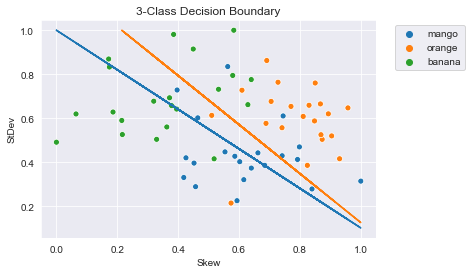

In [27]:
g = sns.scatterplot(data=data, x='Skew', y='StDev', hue='Class')
plt.plot(data['Skew'],y_skew/max(y_skew))
plt.plot(data['StDev'],y_stdev/max(y_stdev))

g.set_title('3-Class Decision Boundary')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:],labels=labels[1:],bbox_to_anchor=(1.28,1.0))
plt.savefig('feature_skew_stdev.png',bbox_inches='tight',dpi=300)
plt.show()